In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
N_exp = 10000
N_con = 10000

In [3]:
# Generating Click Data
click_exp = pd.Series(np.random.binomial(1,0.5,size = N_exp))
click_con = pd.Series(np.random.binomial(1,0.2,size = N_con))

# Generate Group Identifier
exp_id = pd.Series(np.repeat("exp", N_exp))
con_id = pd.Series(np.repeat("con", N_con))

df_exp = pd.concat([click_exp,exp_id],axis = 1)
df_con = pd.concat([click_con,con_id],axis = 1)

df_exp.columns = ["click", "group"]
df_con.columns = ["click", "group"]

df_ab_test = pd.concat([df_exp, df_con], axis=0).reset_index(drop=True)
print(df_ab_test)

       click group
0          0   exp
1          1   exp
2          0   exp
3          0   exp
4          0   exp
...      ...   ...
19995      0   con
19996      0   con
19997      1   con
19998      0   con
19999      0   con

[20000 rows x 2 columns]


In [4]:
# calculating the total number of clicks per group by summing 1's
X_con = df_ab_test.groupby("group")["click"].sum().loc["con"]
X_exp = df_ab_test.groupby("group")["click"].sum().loc["exp"]

# printing this for visibility
print(df_ab_test.groupby("group")["click"].sum())
print("Number of CLicks in Control: ", X_con)
print("Number of CLicks in Experimental: ", X_exp)

group
con    2018
exp    4977
Name: click, dtype: int32
Number of CLicks in Control:  2018
Number of CLicks in Experimental:  4977


In [5]:
# statistical significance level of the test
alpha = 0.05
print("Alpha: significance level is:", alpha )

Alpha: significance level is: 0.05


In [6]:
# computing the estimate of click probability per group
p_con_hat = X_con/N_con
p_exp_hat = X_exp/N_exp
print("Click Probability in Control Group:", p_con_hat)
print("Click Probability in Experimental Group:", p_exp_hat)

Click Probability in Control Group: 0.2018
Click Probability in Experimental Group: 0.4977


In [7]:
# computing the estimate of pooled clicked probability
p_pooled_hat = (X_con+X_exp)/(N_con + N_exp)

# computing the estimate of pooled variance
pooled_variance = p_pooled_hat * (1-p_pooled_hat) * (1/N_con + 1/N_exp)
print("p^_pooled is: ", p_pooled_hat)
print("pooled_variance is: ", pooled_variance)

p^_pooled is:  0.34975
pooled_variance is:  4.5484987500000005e-05


In [8]:
# computing the standard error of the test
SE = np.sqrt(pooled_variance)
print("Standard Error is: ", SE)

Standard Error is:  0.006744255889273479


In [9]:
# computing the test statistics of Z-test
Test_stat = (p_con_hat - p_exp_hat)/SE
print("Test Statistics for 2-sample Z-test is:", Test_stat)

Test Statistics for 2-sample Z-test is: -43.87437322338545


In [10]:
#
Z_crit = norm.ppf(1-alpha/2)
print("Z-critical value from Standard Normal distribution: ", Z_crit)

Z-critical value from Standard Normal distribution:  1.959963984540054


In [11]:
p_value = 2 * norm.sf(abs(Test_stat))
print("P-value of the 2-sample Z-test: ",round(p_value,3))

P-value of the 2-sample Z-test:  0.0


In [12]:
CI = [round((p_exp_hat - p_con_hat) - SE*Z_crit,3), round((p_exp_hat - p_con_hat) + SE*Z_crit,3)]
print("Confidence Interval of the 2 sample Z-test is: ", CI)

Confidence Interval of the 2 sample Z-test is:  [0.283, 0.309]


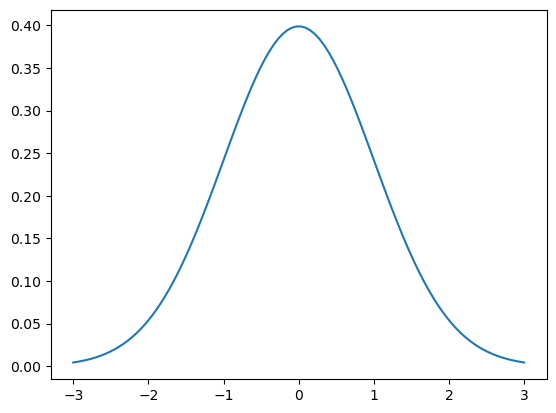

In [13]:
# Parameters for the standard normal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Test statistics and critical value from previous calculation
Test_stat = -42.71219397822086  # This value is from your A/B test results
Z_crit = 1.959963984540054  # Z-critical value for a 5% significance level in a two-tailed test

# Plotting the standard normal distribution
plt.plot(x, y, label='Standard Normal Distribution')

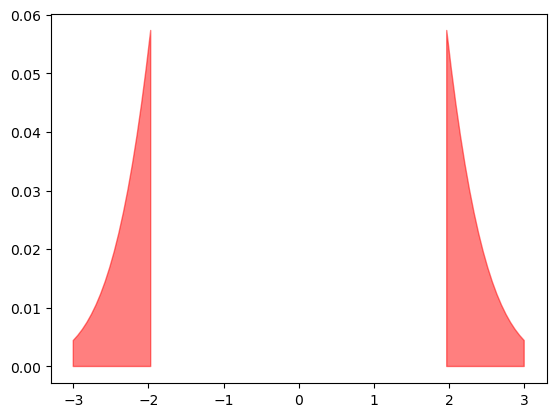

In [14]:
# Shade the rejection region for a two-tailed test
plt.fill_between(x, y, where=(x > Z_crit) | (x < -Z_crit), color='red', alpha=0.5, label='Rejection Region')

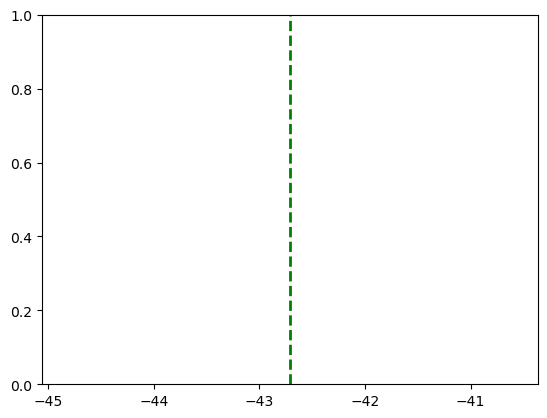

In [15]:
# Adding Test Statistic
plt.axvline(Test_stat, color='green', linestyle='dashed', linewidth=2, label=f'Test Statistic = {Test_stat:.2f}')

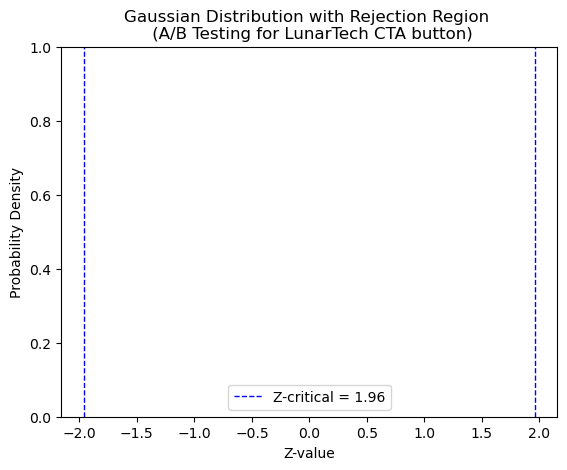

In [24]:
# Adding Z-critical values
plt.axvline(Z_crit, color='blue', linestyle='dashed', linewidth=1, label=f'Z-critical = {Z_crit:.2f}')
plt.axvline(-Z_crit, color='blue', linestyle='dashed', linewidth=1)

# Adding labels and title
plt.xlabel('Z-value')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution with Rejection Region \n (A/B Testing for LunarTech CTA button)')
plt.legend()

# Show plot
plt.show()